Batchnorm, Dropout, learning-rate scheduler.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Input, layers

print(tf.__version__)


In [ ]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

# Now separate out a validation set.
val_frac = 0.1
num_val_samples = int(len(train_images)*val_frac)
# choose num_val_samples indices up to the size of train_images, !replace => no repeats
val_idxs = np.random.choice(np.arange(len(train_images)), size=num_val_samples, replace=False)
trn_idxs = np.setdiff1d(np.arange(len(train_images)), val_idxs)
val_images = train_images[val_idxs, :,:,:]
train_images = train_images[trn_idxs, :,:,:]

val_labels = train_labels[val_idxs]
train_labels = train_labels[trn_idxs]

In [ ]:
train_labels = train_labels.squeeze()
test_labels = test_labels.squeeze()
val_labels = val_labels.squeeze()

input_shape  = train_images.shape[1:]
train_images = train_images / 255.0
test_images  = test_images  / 255.0
val_images   = val_images   / 255.0
print("Training Images range from {:2.5f} to {:2.5f}".format(np.min(train_images), np.max(train_images)))
print("Test     Images range from {:2.5f} to {:2.5f}".format(np.min(test_images), np.max(test_images)))

In [ ]:

print(f"Training:   {len(train_labels)} and image set has shape: {train_images.shape}")
print(f"Validation: {len(val_labels)  } and image set has shape: {val_images.shape}")
print(f"Test:       {len(test_labels) } and image set has shape: {test_images.shape}")



In [ ]:
# Set seed for experiment reproducibility
seed = 3
tf.random.set_seed(seed)
np.random.seed(seed)


In [ ]:
model0 = tf.keras.Sequential([
  Input(shape=input_shape),
  layers.Conv2D(64, kernel_size=(3,3), activation="relu", padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  # layers.BatchNormalization(),
  
  layers.Conv2D(128, kernel_size=(3,3), activation="relu", padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),    
  # layers.BatchNormalization(),
  
  layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),    
  # layers.BatchNormalization(),
  
  layers.Conv2D(256, kernel_size=(3,3), activation="relu", padding='same'),
  layers.MaxPooling2D(pool_size=(2, 2)),    
  # layers.BatchNormalization(),
  # layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  # layers.BatchNormalization(),
  layers.Dense(256, activation='relu'),
  # layers.BatchNormalization(),
  layers.Dense(10)
])
model0.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model0.summary()

In [ ]:
train_hist_plain = model0.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), # or use `validation_split=0.1`
                       epochs=20)

In [ ]:
# rs.standard_normal()

In [ ]:
model_plain = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), padding='same', activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, kernel_size=(3,3), padding='same', activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(128, kernel_size=(3,3), padding='same', activation="relu"),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(256, kernel_size=(3,3), padding='same', activation="relu"),    
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10)
])
    
model_plain.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_plain.summary()

In [ ]:
train_hist_plain = model_plain.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), # or use `validation_split=0.1`
                       epochs=20)

In [ ]:
model_bn = tf.keras.Sequential([
    Input(shape=input_shape),
    layers.Conv2D(32, kernel_size=(3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(128, kernel_size=(3,3), padding='same'),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(256, kernel_size=(3,3), padding='same'),  
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Flatten(),
    layers.Dense(128),
    layers.BatchNormalization(),
    layers.Activation('relu'),

    layers.Dense(10)
])
    
model_bn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_bn.summary()

In [ ]:
train_hist_bn = model_bn.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), # or use `validation_split=0.1`
                       epochs=20)

In [ ]:
test_loss, test_acc = model_bn.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy (w/ BN):', test_acc)

test_loss, test_acc = model_plain.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy (No BN):', test_acc)

In [ ]:
plt.subplot(2,1,1)
plt.plot(train_hist_bn.epoch, train_hist_bn.history['accuracy'], 
        train_hist_plain.epoch, train_hist_plain.history['accuracy'])

plt.legend(['Train Acc. w/ BatchNorm', 'Train Acc. No BatchNorm'])
plt.grid(True)
plt.subplot(2,1,2)
plt.plot(train_hist_bn.epoch, train_hist_bn.history['val_accuracy'], 
        train_hist_plain.epoch, train_hist_plain.history['val_accuracy'])

plt.legend(['Val Acc. w/ BatchNorm', 'Val Acc. No BatchNorm'])
plt.grid(True)

In [ ]:
model_drop = tf.keras.Sequential([
  Input(shape=input_shape),
  layers.Conv2D(32, kernel_size=(3,3), padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),

  layers.Conv2D(64, kernel_size=(3,3), padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
    
  layers.Conv2D(128, kernel_size=(3,3), padding='same'),
  layers.BatchNormalization(),
  layers.Activation('relu'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Dropout(0.25),
  
  layers.Conv2D(256, kernel_size=(3,3), padding='same'),  
  layers.BatchNormalization(),
  layers.Activation('relu'),
  layers.Dropout(0.25),

  layers.Flatten(),
  layers.Dense(128),
  layers.BatchNormalization(),
  layers.Activation('relu'),
  layers.Dropout(0.25),

  layers.Dense(10) # can't dropout last layer
])

model_drop.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model_drop.summary()

In [ ]:
train_hist_dr = model_drop.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), # or use `validation_split=0.1`
                       epochs=50)

In [ ]:
plt.plot(train_hist_dr.epoch, train_hist_dr.history['accuracy'], 'b-', label='Train Acc. w/ Dropout')
plt.plot(train_hist_bn.epoch, train_hist_bn.history['accuracy'], 'r-', label='Train Acc. w/ Dropout')
plt.plot(train_hist_dr.epoch, train_hist_dr.history['val_accuracy'], 'b--', label='Val Acc. w/ Dropout')
plt.plot(train_hist_bn.epoch, train_hist_bn.history['val_accuracy'], 'r--', label='Val Acc. No Dropout')
        

plt.legend()
plt.grid(True)


In [75]:
def conv_block(num_channels=32, kernel_size=(3,3), pool_size=(1,1),
               padding='same', drop_rate=None, activation='relu',
               use_batchnorm=False):
  def conv_blk_func(inputs):
    x = layers.Conv2D(num_channels, kernel_size=kernel_size, padding=padding)(inputs)
    if use_batchnorm:
      x = layers.BatchNormalization()(x)
    x = layers.Activation(activation)(x)
    if pool_size != (1,1) and pool_size != 1:
      x = layers.MaxPooling2D(pool_size=pool_size)(x)
    if drop_rate is not None:
      x = layers.Dropout(drop_rate)(x)
    return x
  return conv_blk_func


def build_model(input_shape, model_config):
  inputs = Input(shape=input_shape)
  x = inputs
  for idx in range(len(model_config['conv_num_channels'])):
    x = conv_block(num_channels=model_config['conv_num_channels'][idx], 
                   kernel_size=model_config['conv_kernel_sizes'][idx], 
                   pool_size=model_config['conv_pool_sizes'][idx], 
                   drop_rate=model_config['conv_drop_rates'][idx], 
                   use_batchnorm=model_config['conv_use_batchnorm'][idx])(x)

  if model_config['final_pool'] == 'average':
    x = layers.GlobalAveragePooling2D()(x)
  elif model_config['final_pool'] == 'max':
    x = layers.GlobalMaxPooling2D()(x)
  else:    
    x = layers.Flatten()(x)
  
  for idx in range(len(model_config['dense_sizes'])):
    x = layers.Dense(model_config['dense_sizes'][idx])(x)
    if model_config['dense_batchnorm'][idx]:
      x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    if model_config['dense_droprates'][idx] is not None:
      x = layers.Dropout(model_config['dense_droprates'][idx])(x)
    
  x = layers.Dense(model_config['num_classes'])(x) # can't dropout last layer
  
  model = tf.keras.models.Model(inputs=inputs, outputs=x)
  
  return model 



1406.25

In [86]:
num_epochs = 2
batch_size = 32
steps_per_epoch = train_images.shape[0]/batch_size

lr_schedule = tf.keras.optimizers.schedules.CosineDecay(1e-2, steps_per_epoch*num_epochs)

compile_args = {
  'optimizer':tf.keras.optimizers.legacy.Adam(learning_rate=lr_schedule), # use tf.keras.optimizers.Adam on Intel / NVidia GPU
  'loss':tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  'metrics':['accuracy']
  }

fit_args = {
  'epochs':num_epochs
}

model_config1 = {'conv_num_channels':[64, 128, 128, 256],
                 'conv_kernel_sizes':8*[3],
                 'conv_pool_sizes':[2, 1, 2, 2],
                 'conv_drop_rates':4*[.25],
                 'conv_use_batchnorm':4*[True],
                 'dense_sizes':[128],
                 'dense_droprates':[0.2],
                 'dense_batchnorm':[True],
                 'final_pool': 'max',
                 'num_classes': 10,
               }

model1 = build_model(input_shape=input_shape, model_config=model_config1)
model1.compile(**compile_args)

model2.summary()

train_hist_1 = model1.fit(train_images, train_labels, 
                          validation_data=(val_images, val_labels), 
                          **fit_args
                         )
################################################

model_config2 = model_config1.copy()
model_config2['conv_drop_rates'] = [None]*len(model_config2['conv_drop_rates']) # replace all w/  None
model_config2['dense_droprates'] = [None]*len(model_config2['dense_droprates']) # replace all w/  None


model2 = build_model(input_shape=input_shape, model_config=model_config2)
model2.compile(**compile_args)
# model2.summary()
train_hist_2 = model2.fit(train_images, train_labels, 
                       validation_data=(val_images, val_labels), 
                       **fit_args)

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_125 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization_140 (B  (None, 32, 32, 64)        256       
 atchNormalization)                                              
                                                                 
 activation_140 (Activation  (None, 32, 32, 64)        0         
 )                                                               
                                                                 
 max_pooling2d_79 (MaxPooli  (None, 16, 16, 64)        0         
 ng2D)                                                           
                                                          

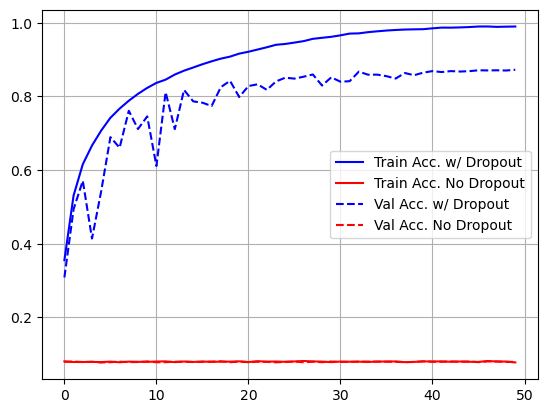

In [87]:
plt.plot(train_hist_1.epoch, train_hist_1.history['accuracy'], 'b-', label='Train Acc. w/ Dropout')
plt.plot(train_hist_2.epoch, train_hist_2.history['accuracy'], 'r-', label='Train Acc. No Dropout')
plt.plot(train_hist_1.epoch, train_hist_1.history['val_accuracy'], 'b--', label='Val Acc. w/ Dropout')
plt.plot(train_hist_2.epoch, train_hist_2.history['val_accuracy'], 'r--', label='Val Acc. No Dropout')
        
plt.legend()
plt.grid(True)
